##project 1. this is a new change

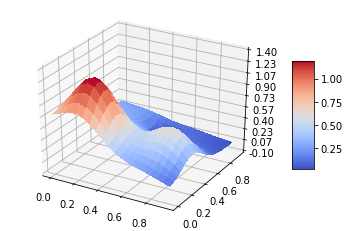

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from numpy.random import rand, randn, seed
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4
z = FrankeFunction(x, y)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [6]:
def MSE(data, model):
    """
    Calculates the Mean Squared Error if both data and model are vectos
    Calculates Variance if data is vector and model is the mean value of the data
    """
    n = np.shape(data)[0]
    res = np.array(data - model)
    return 1.0/n *res.dot(res)

def R2(data, model):
    """
    calculate the R2 score function
    """
    numerator = MSE(data, model)
    denominator = MSE(data, np.mean(data))
    return 1 - numerator/denominator

def generate_sample(n, mean = 0, var = 1):
    """
    Generates (n,3) samples [x,y,z], where x,y are uniform random numbers [0,1) 
    and z = f(x,y) + eps with f the Franke function and eps normal distributed with mean and var
    """
    x, y = rand(2,n)
    z = FrankeFunction(x,y) + np.sqrt(var)*randn(n) + mean
    return np.array([x, y, z])

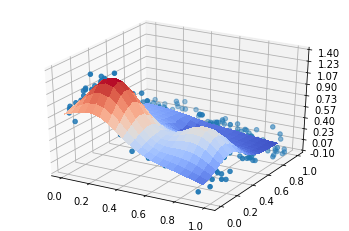

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(*generate_sample(500, var=10**(-2)))
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()